# Project 1: Mandelbrot<br><small>Joshua Nasiatka (2016.12.03)

## Project Background
We investigate the Mandelbrot set, a set of number in the complex plane formed by iterating a complex map and
determining the set of points that is bounded. Here we give some background on this. Before starting this make sure
that you understand basic operations with complex numbers that were given in the course notes (weeks 2 and 3).

## A Mandelbrot Module
To answer the questions below, you should write a Module to do at least the following:  
- A `MandelbrotView` type. This should contain the min and max of the view for a plot of the Mandelbrot set. You may use 2 complex numbers to store these, 4 reals, or other possibilities. You should also have optional parameters for the resulting size of the image.

- An `iterate` function that iterates a general complex function a certain number of times.

- An `is_in_mbset` function that takes a complex number as input and returns true or false depending on if the input is in the mandelbrot set as explained above. Assume that the initial point is `0+0im`.

- A `leaving_number` function that takes a complex number, c as input and returns the number of iterations to leave defined as $|z_n| > 2$. You should use a optional parameter to determine the maximum number of iterations (use 10 as the default) to take and take another optional parameter for the initial point (use `0+0im` as the
default)

- A `plot` function that takes as input a `MandelbrotView` type and produces a plot. It is recommended to create an image similar to that of the complex Newton’s method from class. You should also consider setting the aspect ratio to 1 in this case to avoid stretching out the plot.

- For each of the types and functions, you should check that the parameters are valid.

- Write a Unit test (as a separate file) to test that your types/functions are working as expected. (Note: think of the basics like needed parameters are positive, for example).

## Problem 1:
Find the first ten iterations of the complex map with $x_0 = 0$ and $c = −i$, $0.4 + 0i$, $−0.5 + 0.5i$ and $0.4i$. Which of these values, does the sequence appear to converge? If the sequence doesn’t converge, does it appear that the sequence is bounded?

In [1]:
### check to see if the current directory is in the load path and if not, load it.
if !("." in LOAD_PATH)
    push!(LOAD_PATH,".")
end

using Mandelbrot

In [14]:
arr1 = iterate(-im)

Series is bounded.


10-element Array{Any,1}:
 -1-1im
  0+1im
 -1-1im
  0+1im
 -1-1im
  0+1im
 -1-1im
  0+1im
 -1-1im
  0+1im

In [3]:
arr2 = iterate(0.4+0im)

Not bounded.


10-element Array{Any,1}:
      0.56+0.0im
    0.7136+0.0im
  0.909225+0.0im
   1.22669+0.0im
   1.90477+0.0im
   4.02814+0.0im
   16.6259+0.0im
   276.822+0.0im
   76630.6+0.0im
 5.87226e9+0.0im

In [4]:
arr3 = iterate(-0.5+0.5im)

Series is bounded.


10-element Array{Any,1}:
       -0.5+0.0im      
      -0.25+0.5im      
    -0.6875+0.25im     
 -0.0898438+0.15625im  
  -0.516342+0.471924im 
  -0.456103+0.0126517im
   -0.29213+0.488459im 
  -0.653252+0.214613im 
   -0.11932+0.219608im 
   -0.53399+0.447593im 

In [5]:
arr4 = iterate(0.4im)

Series is bounded.


10-element Array{Any,1}:
      -0.16+0.4im     
    -0.1344+0.272im   
 -0.0559206+0.326886im
  -0.103728+0.363441im
   -0.12133+0.324602im
 -0.0906458+0.321232im
 -0.0949735+0.341763im
  -0.107782+0.335083im
  -0.100664+0.327768im
 -0.0972987+0.334011im

## Problem 2:
For each of the sequences in #1, plot the absolute value of the iterations (recall this means the distance from the origin). (Hint: you may want to use a log scale for any that grow very fast and if you use a log scale, throw out the first point which has a distance of 0 and the log of 0 is not defined.)

In [6]:
using Gadfly

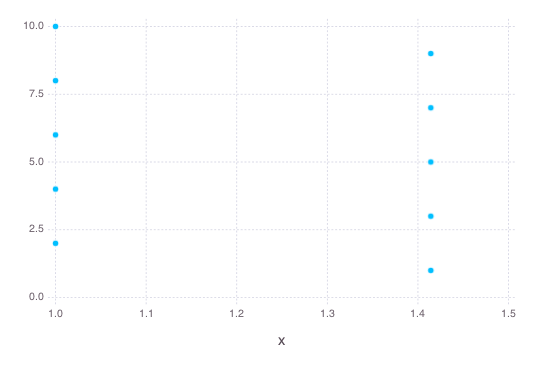

In [15]:
plot(x=map(x->abs(x),arr1),Geom.point)

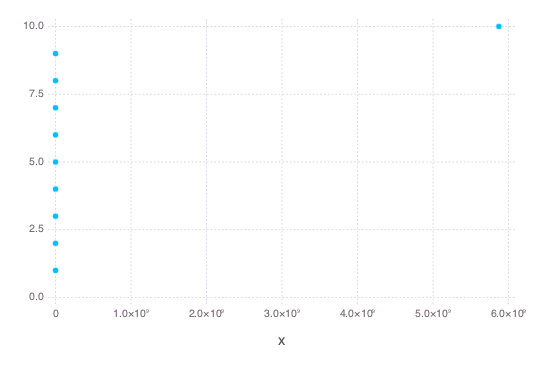

In [16]:
plot(x=map(x->abs(x),arr2),Geom.point)

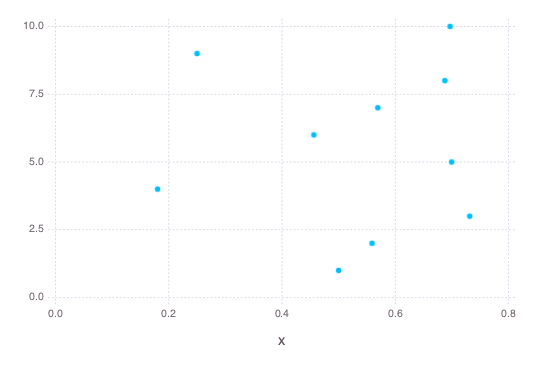

In [17]:
plot(x=map(x->abs(x),arr3),Geom.point)

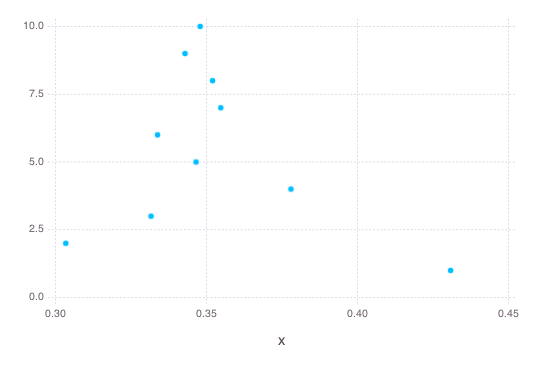

In [18]:
plot(x=map(x->abs(x),arr4),Geom.point)